# Network #1


## Network Input:  

YEAR,
MONTH,
DAY,
Neighbourhood
## Output:

Number of crimes likely to occur


#### Loading data and creating dataset to be used

##### Importing dataset

In [10]:
# Importing needed libraries
from keras import layers
from keras import models
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential

#defining some useful functions
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()



# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/crime_ymdn_bins.csv'
dataset = pd.read_csv(file_path,  error_bad_lines=False)
dataset.head()

,YEAR,MONTH,DAY,Crime,Neighbourhood,Bins
0,2004,1,1,5.0,Sunset,2
1,2004,1,2,5.0,Sunset,2
2,2004,1,3,3.0,Sunset,1
3,2004,1,4,5.0,Sunset,2
4,2004,1,5,3.0,Sunset,1


##### Visualizing dataset

Number of Samples in dataset: 108734



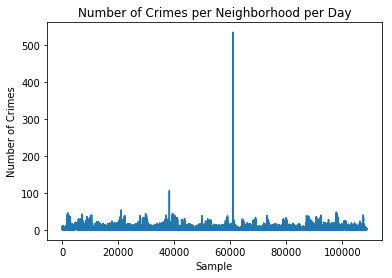

In [12]:
data = dataset.sort_values(by = 'YEAR')
crime = data['Crime'].values

plt.plot(crime)
plt.ylabel('Number of Crimes')
plt.xlabel('Sample')
plt.title('Number of Crimes per Neighborhood per Day')

print("Number of Samples in dataset: " + str(crime.shape[0]) + '\n')

#### Preparing Data for Network

In [4]:
scaler = MinMaxScaler()

#extracting samples from dataset
samples_pd = dataset[['YEAR','MONTH','DAY']]
neigh = dataset['Neighbourhood']
onehot_neigh = pd.get_dummies(neigh)

samples = np.concatenate((samples_pd.values, onehot_neigh.values), axis = 1) 

#normalizing values
scaler.fit(samples)
samples = scaler.transform(samples)

#extracting labeles from dataset
labeles_pd = dataset['Bins']
labeles = to_categorical(np.array(labeles_pd))


# Split training and validation sets randomly
x_train, x_test, y_train, y_test = train_test_split(samples, labeles, train_size=0.8,test_size=0.2, random_state=101) 

print("Dataset Samples Shape: " + str(samples.shape))
print("Dataset Labels Shape: " + str(labeles.shape))
print()
print("Training Samples Shape: " + str(x_train.shape))
print("Training Labels Shape: " + str(y_train.shape))
print()
print("Test Samples Shape: " + str(x_test.shape))
print("Test Labeles Shape: " + str(y_test.shape))
print()
# print(samples[-1,:])

Dataset Samples Shape: (108734, 25)
Dataset Labels Shape: (108734, 4)

Training Samples Shape: (86987, 25)
Training Labels Shape: (86987, 4)

Test Samples Shape: (21747, 25)
Test Labeles Shape: (21747, 4)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


#### Training Network

In [5]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1], ) ) )
model.add(Dense(128, activation='relu') )
model.add(Dense(256, activation='relu') )
model.add(Dense(1024, activation='relu') )
model.add(Dense(128, activation='relu') )
model.add(Dense(64, activation='relu') )


model.add(Dense(labeles.shape[1], activation='softmax') )

model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dens

In [6]:
history = model.fit(x_train, y_train,
          epochs = 50,
          batch_size=256,
          validation_split=0.2,
          verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 69589 samples, validate on 17398 samples
Epoch 1/50
69589/69589 [==============================] - 4s 53us/step - loss: 0.9839 - acc: 0.5621 - val_loss: 0.9569 - val_acc: 0.5766
Epoch 2/50
69589/69589 [==============================] - 1s 15us/step - loss: 0.9490 - acc: 0.5776 - val_loss: 0.9472 - val_acc: 0.5787
Epoch 3/50
69589/69589 [==============================] - 1s 15us/step - loss: 0.9444 - acc: 0.5768 - val_loss: 0.9477 - val_acc: 0.5800
Epoch 4/50
69589/69589 [==============================] - 1s 14us/step - loss: 0.9424 - acc: 0.5788 - val_loss: 0.9440 - val_acc: 0.5781
Epoch 5/50
69589/69589 [==============================] - 1s 14us/step - loss: 0.9412 - acc: 0.5789 - val_loss: 0.9428 - val_acc: 0.5796
Epoch 6/50
69589/69589 [==============================] - 1s 15us/step - loss: 0.9402 - acc: 0.5806 - val_loss: 0.9433 - val_acc: 0.5788
Epoch 7/50
69589/69589 [==============================] - 1s 15us/step - loss: 0

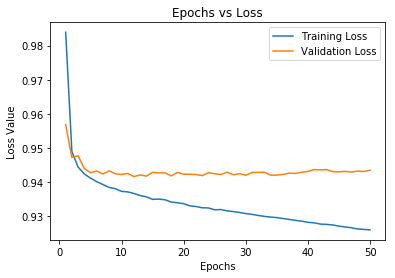

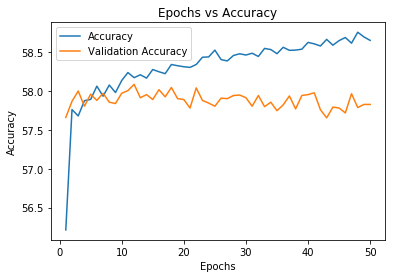

In [7]:
loss_curve(history)
accuracy(history)

#### Testing Network

In [8]:
#Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)


#obtaining the confusion matrix (values must be the original labels, not one-hot-encoding)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


print("Test Loss: " + str(test_loss))
print("Test Accuracy: " + str(test_acc) + "\n")

print("Confusion Matrix:")
print(matrix)

21747/21747 [==============================] - 1s 35us/step
Test Loss: 0.9334615581900727
Test Accuracy: 0.5771370763810919

Confusion Matrix:
[[5556 1248   79  180]
 [2643 1913  273  721]
 [ 564 1133  280 1263]
 [ 164  654  274 4802]]
